In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from helpers_plot import finalizePlot, initPlot

In [28]:
initPlot()

In [29]:
gtilde_north=np.loadtxt("measurements/gtilde/north.gtilde_single.dat")
gtilde_south=np.loadtxt("measurements/gtilde/south.gtilde_single.dat")
gtilde_all=np.loadtxt("measurements/gtilde/all.gtilde.dat")
gtilde_north.shape
Nbins=50

In [30]:
gtilde_north_real=gtilde_north[:,6]
gtilde_north_imag=gtilde_north[:,7]
gtilde_north_weight=gtilde_north[:,8]


gtilde_north_real=gtilde_north_real.reshape(Nbins, Nbins, Nbins)
gtilde_north_imag=gtilde_north_imag.reshape(Nbins, Nbins, Nbins)
gtilde_north_weight=gtilde_north_weight.reshape(Nbins, Nbins, Nbins)


gtilde_south_real=gtilde_south[:,6]
gtilde_south_imag=gtilde_south[:,7]
gtilde_south_weight=gtilde_south[:,8]


gtilde_south_real=gtilde_south_real.reshape(Nbins, Nbins, Nbins)
gtilde_south_imag=gtilde_south_imag.reshape(Nbins, Nbins, Nbins)
gtilde_south_weight=gtilde_south_weight.reshape(Nbins, Nbins, Nbins)


gtilde_all_real=gtilde_all[:,6]
gtilde_all_imag=gtilde_all[:,7]
gtilde_all_weight=gtilde_all[:,8]


gtilde_all_real=gtilde_all_real.reshape(Nbins, Nbins, Nbins)
gtilde_all_imag=gtilde_all_imag.reshape(Nbins, Nbins, Nbins)
gtilde_all_weight=gtilde_all_weight.reshape(Nbins, Nbins, Nbins)


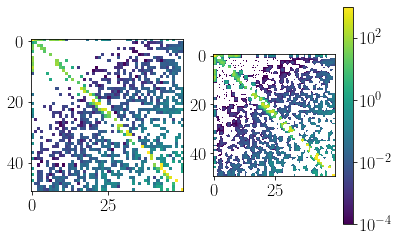

In [31]:
fig, ax = plt.subplots(ncols=2)
phibin=0
ax[0].imshow(gtilde_all_real[:,:,phibin]*gtilde_all_weight[:,:,phibin], norm=mpl.colors.LogNorm(vmin=1e-4, vmax=1e3))
im=ax[1].imshow(gtilde_north_real[:,:,phibin]*gtilde_north_weight[:,:,phibin]+gtilde_south_real[:,:,phibin]*gtilde_south_weight[:,:,phibin], norm=mpl.colors.LogNorm(vmin=1e-4, vmax=1e3))

fig.colorbar(im)



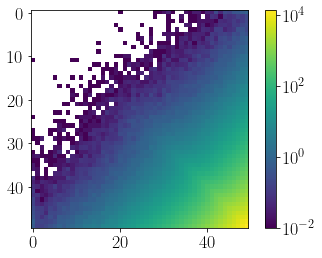

In [32]:
plt.imshow(gtilde_north_weight[:,:,1], norm=mpl.colors.LogNorm())
plt.colorbar()

In [33]:
north=np.loadtxt("measurements/NNMap/north.N2Map.dat")
south=np.loadtxt("measurements/NNMap/south.N2Map.dat")
all=np.loadtxt("measurements/NNMap/all.N2Map.dat")



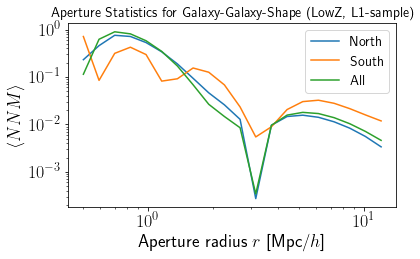

In [34]:
fig, ax=plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(north[:,0], np.abs(north[:,3]), label='North')
ax.plot(south[:,0], np.abs(south[:,3]), label='South')
ax.plot(all[:,0], np.abs(all[:,3]), label='All')

ax.hlines(0, min(north[:,0]), max(north[:,0]), color='k')
ax.set_xlabel(r"Aperture radius $r$ [Mpc/$h$]")
ax.set_ylabel(r"$\langle NNM \rangle$")

finalizePlot(ax, "Aperture Statistics for Galaxy-Galaxy-Shape (LowZ, L1-sample)")

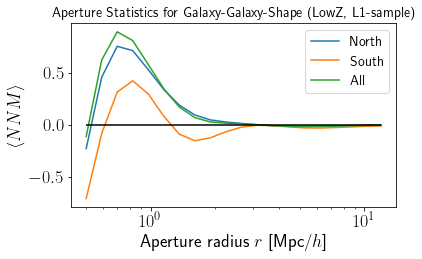

In [35]:
fig, ax=plt.subplots()

#ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(north[:,0], (north[:,3]), label='North')
ax.plot(south[:,0], (south[:,3]), label='South')
ax.plot(all[:,0], (all[:,3]), label='All')
#ax.plot(north[:,0], north[:,3]+south[:,3])

ax.hlines(0, min(north[:,0]), max(north[:,0]), color='k')
ax.set_xlabel(r"Aperture radius $r$ [Mpc/$h$]")
ax.set_ylabel(r"$\langle NNM \rangle$")

finalizePlot(ax, "Aperture Statistics for Galaxy-Galaxy-Shape (LowZ, L1-sample)")

In [37]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd


In [39]:
filename=r"data\north_density.fits"
data = Table.read(filename, format='fits').to_pandas()


In [43]:
data.head()

,RA,DEC,Z,e1,e2,WEIGHT_FKP,WEIGHT_CP,WEIGHT_NOZ,WEIGHT_STAR,WEIGHT_SEEING,WEIGHT_SYSTOT,Mu_ke0,Mg_ke0,Mr_ke0,Mi_ke0,Mz_ke0,DA,jackknife_ID,X,Y
0,195.211710,-0.505258,0.345888,0.158104,-0.076799,0.227029,1.0,1.0,1.0,1.0,1.0,-999.000000,-20.884115,-21.622444,-22.054237,-22.444876,710.940051,6,119.882099,-361.399158
1,225.586971,-0.046532,0.332610,0.107626,0.033516,0.226787,1.0,1.0,1.0,1.0,1.0,-19.535934,-20.940083,-21.751516,-22.148893,-22.532366,692.738176,21,484.062405,-346.600160
2,225.513692,-0.190260,0.332531,-0.055152,-0.128687,0.227034,1.0,1.0,1.0,1.0,1.0,-999.000000,-20.736992,-21.573034,-21.956991,-22.253622,692.627276,21,483.101583,-348.282145
3,195.095915,-1.063041,0.248512,-0.085485,0.213857,0.236770,1.0,1.0,1.0,1.0,1.0,-18.734627,-21.157776,-21.927965,-22.281872,-22.573008,563.920793,6,93.963805,-292.153261
4,195.210161,-1.064036,0.309910,0.173232,-0.271560,0.241339,1.0,1.0,1.0,1.0,1.0,-18.952906,-21.366879,-22.089720,-22.421467,-22.715347,660.334281,6,111.345734,-342.114139


In [52]:
dataJN0=data[data["jackknife_ID"]==7]

len(dataJN0)

1434